In [1]:
"""
Syntax dibawah merupakan syntax untuk mengimport/memanggil library library yang akan
digunakan untuk mengolah citra yang ada, library-library yang digunakan antara lain, 
metplotlib.pyplot (plt), cv2 (cv) dan numpy (np)
"""
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
"""
Syntax dibawah merupakan pendefinisian sebuah function yaitu function padding
yang dimana merupakan function yang digunakan untuk memproses transformasi wavelet
sebuah citra yang dimasukkan kedalam function ini
"""
def padding (matrix, banyak_padding):
    padded_matrix = np.pad(matrix,(0,banyak_padding),'constant')
    return padded_matrix

In [3]:
"""
Syntax dibawah merupakan pendefinisian sebuah function yaitu function padding
yang dimana merupakan function yang digunakan untuk memproses transformasi wavelet
sebuah citra yang dimasukkan kedalam function ini
"""
def strip_pads (matrix, banyak_padding):
    striped_matrix = np.zeros([matrix.shape[0]-banyak_padding,matrix.shape[1]-banyak_padding])
    
    """
    Syntax dibawah merupakan perulangan for yang digunakan 
    untuk iterasi dari pixel (0,0) pada citra sampai index 
    terakhir dari citra
    """
    for r in range(striped_matrix.shape[0]):
        for c in range(striped_matrix.shape[1]):
            striped_matrix[r,c] = matrix[r,c]
    
    """
    Syntax dibawah merupakan pengembalian hasil padding 
    sebuah citra setelah pemanggilan dari function ini
    """
    return striped_matrix

In [4]:
"""
Syntax dibawah merupakan pendefinisian sebuah function yaitu function filtering
yang dimana merupakan function yang digunakan untuk memproses transformasi wavelet
sebuah citra yang dimasukkan kedalam function ini
"""
def filtering (matrix, kernel):
    padded_matrix = padding(matrix, len(kernel)-1)
    hasil = np.zeros(matrix.shape)

    """
    Syntax dibawah merupakan perulangan for yang digunakan 
    untuk iterasi dari pixel (0,0) pada citra sampai index 
    terakhir dari citra
    """
    for r in range (matrix.shape[0]):
        for c in range (matrix.shape[1]):
            for i in range (len(kernel)):
                hasil[r,c] += (kernel[i]*padded_matrix[r,c+i])
    hasil = strip_pads(hasil, len(kernel)-1)

    """
    Syntax dibawah merupakan pengembalian hasil filtering 
    sebuah citra setelah pemanggilan dari function ini
    """
    return hasil

In [5]:
"""
Syntax dibawah merupakan pendefinisian sebuah function yaitu function unite
yang dimana merupakan function yang digunakan untuk memproses transformasi wavelet
sebuah citra yang dimasukkan kedalam function ini
"""
def unite (LL, LH, HL, HH):
    atas=np.concatenate((LL,HL),axis=1)
    bawah=np.concatenate((LH,HH),axis=1)

    """
    Syntax dibawah merupakan pengembalian hasil unite 
    sebuah citra setelah pemanggilan dari function ini
    """
    return np.concatenate((atas,bawah),axis=0)

## DEKOMPOSISI

In [6]:
"""
Syntax dibawah merupakan inisialisasi dari variabel kernel_lowD
dan kernel_highD yang mana merupakan kernel yang nilainya
sudah memiliki ketentuan yaitu 0,7.... dan -0,7......
"""
kernel_lowD = [0.7,0.7]
kernel_highD = [-0.7,0.7]

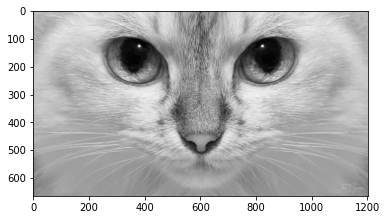

In [7]:

"""
Syntax dibawah merupakan inisialisasi dari variabel image, yang mana merupakan
variabel yang digunakan untuk menyimpan citra yang akan diolah dengan menggunakan
method imread dari library matplotlib.pyplot (plt) yang dimana citranya diambil dari local komputer
dan menampilkannya dengan method imshow dari method yang sama
"""
image=cv2.imread('Jurnal4.jpg')

"""
Syntax dibawah merupakan inisialisasi dari variabel gray_image yang merupakan variabel yang berisi
citra sebelumnya pada variabel imgae namun diubah kedalam intensitas warna abu
dengan menggunakan method grayscale dari library cv2
"""
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(gray_image, cmap = "gray")

In [8]:
"""
Syntax dibawah merupakan proses untuk melakukan
konvolusi pada citra menggunakan kernel yang ada
dan di konvolusi 
"""
L_filtered = filtering(gray_image, kernel_lowD)
L_down = L_filtered[::2,::]

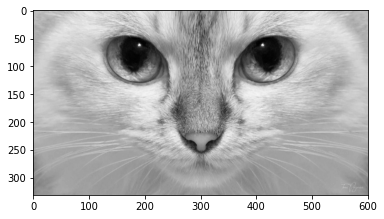

In [9]:
"""
Syntax dibawah merupakan proses untuk melakukan
konvolusi pada citra menggunakan kernel yang ada
dan di konvolusi 
"""
LL_filtered = filtering(L_down.T, kernel_lowD).T
LL_down = LL_filtered[::,::2]
plt.imshow(LL_down, cmap='gray')

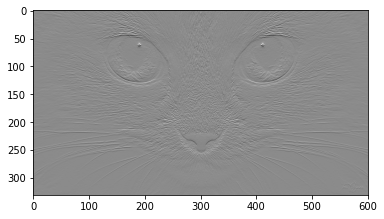

In [10]:
"""
Syntax dibawah merupakan proses untuk melakukan
konvolusi pada citra menggunakan kernel yang ada
dan di konvolusi 
"""
LH_filtered = filtering(L_down.T, kernel_highD).T
LH_down = LH_filtered[::,::2]
plt.imshow(LH_down, cmap='gray')

In [11]:
"""
Syntax dibawah merupakan proses untuk melakukan
konvolusi pada citra menggunakan kernel yang ada
dan di konvolusi 
"""
H_filtered = filtering(gray_image, kernel_highD)
H_down = H_filtered[::2,::]

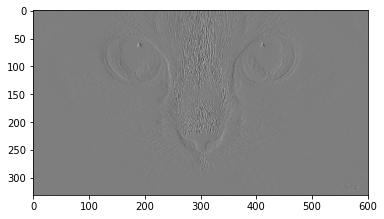

In [12]:
"""
Syntax dibawah merupakan proses untuk melakukan
konvolusi pada citra menggunakan kernel yang ada
dan di konvolusi 
"""
HL_filtered = filtering(H_down.T, kernel_lowD).T
HL_down = HL_filtered[::,::2]
plt.imshow(HL_down, cmap='gray')

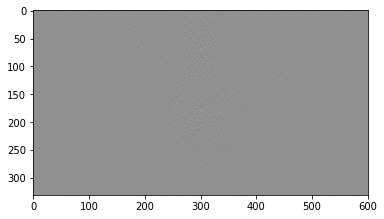

In [13]:
"""
Syntax dibawah merupakan proses untuk melakukan
konvolusi pada citra menggunakan kernel yang ada
dan di konvolusi 
"""
HH_filtered = filtering(H_down.T, kernel_highD).T
HH_down = HH_filtered[::,::2]
plt.imshow(HH_down, cmap='gray')

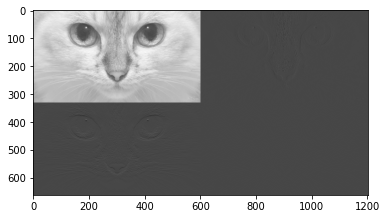

In [14]:
"""
Syntax dibawah merupakan untuk menampilkan secara bersampingan
hasil konvolusi dari citra secara vertikal, horizontal dan diagonal
"""
DWT_unite = unite(LL_down, LH_down, HL_down, HH_down)
plt.imshow(DWT_unite, cmap='gray')

## REKONSTRUKSI

In [28]:
"""
Syntax dibawah merupakan proses untuk melakukan
rekonstruksi pada citra menggunakan kernel yang ada
"""
kernel_lowR = [0.7,0.7]
kernel_highR = [0.7,-0.7]

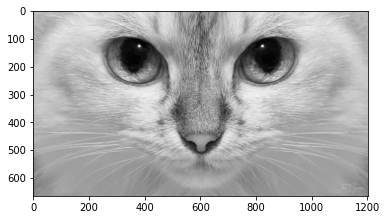

In [29]:
"""
Syntax dibawah merupakan insialisasi dari variabel LLimg, yang mana merupakan
variabel yang digunakan untuk menyimpan citra yang akan diolah dengan menggunakan
method imread dari library matplotlib.pyplot (plt) yang dimana citranya diambil dari local komputer
dan menampilkannya dengan method imshow dari method yang sama
"""
LLimg = cv2.imread('Jurnal4.jpg')

"""
Syntax dibawah merupakan inisialisasi dari variabel LLimg yang merupakan variabel yang berisi
citra sebelumnya pada variabel imgae namun diubah kedalam intensitas warna abu
dengan menggunakan method grayscale dari library cv2
"""
LL_img = cv2.cvtColor(LLimg, cv2.COLOR_BGR2GRAY) 
plt.imshow(LL_img, cmap = "gray")

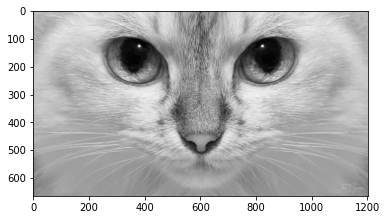

In [30]:
"""
Syntax dibawah merupakan insialisasi dari variabel LHimg, yang mana merupakan
variabel yang digunakan untuk menyimpan citra yang akan diolah dengan menggunakan
method imread dari library matplotlib.pyplot (plt) yang dimana citranya diambil dari local komputer
dan menampilkannya dengan method imshow dari method yang sama
"""
LHimg = cv2.imread('Jurnal4.jpg')

"""
Syntax dibawah merupakan inisialisasi dari variabel LHimg yang merupakan variabel yang berisi
citra sebelumnya pada variabel imgae namun diubah kedalam intensitas warna abu
dengan menggunakan method grayscale dari library cv2
"""
LH_img = cv2.cvtColor(LHimg, cv2.COLOR_BGR2GRAY)
plt.imshow(LH_img, cmap = "gray")

In [31]:
"""
Syntax dibawah merupakan proses untuk melakukan
resize pada citra yang ada
"""
LL_upc = cv2.resize(LL_img,(2*LL_img.shape[0],LL_img.shape[1]), interpolation=cv2.INTER_AREA)
LL_upc[1::2,::] =0

"""
Syntax dibawah merupakan proses untuk melakukan
resize pada citra yang ada
"""
LH_upc = cv2.resize(LH_img,(2*LH_img.shape[0],LH_img.shape[1]), interpolation=cv2.INTER_AREA)
LH_upc[1::2,::] =0

In [32]:
"""
Syntax dibawah merupakan proses untuk melakukan
filtering pada citra yang ada
"""
LLc_filtered1 = filtering(LL_upc.T, kernel_lowR).T
LHc_filtered2 = filtering(LH_upc.T, kernel_highR).T
L_united = LLc_filtered1 + LHc_filtered2

In [33]:
"""
Syntax dibawah merupakan proses untuk melakukan
resize pada citra yang ada
"""
L_upr = cv2.resize(L_united,(2*L_united.shape[0],L_united.shape[1]), interpolation=cv2.INTER_AREA)
L_upr[::,1::2] =0

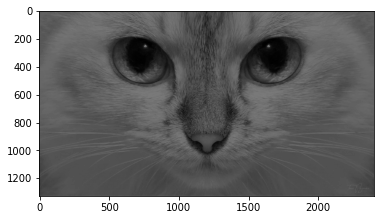

In [34]:
"""
Syntax dibawah merupakan proses untuk melakukan
filtering pada citra yang ada dan menampilkan hasil
rekonstruksinya
"""
L_normal = filtering(L_upr, kernel_lowR)
plt.imshow(L_normal, cmap='gray')